# Bonus Quiz 4B: Regression
## Wine - GridSearchCV with 7 ML Models

![Wine Cover](./wines-photo.jpg)

We will attempt to predict red wine quality using **GridSearchCV** with **7 different machine learning models**. We will then identify the features that have the most impact on our model. Along the way, we should be able to understand the strengths and weaknesses of each model in terms of predictive performance, interpretability, and run time.

The dataset we will use is the [**Wine Quality Data Set**](https://archive.ics.uci.edu/ml/datasets/Wine+Quality), which contains the grading quality and various information about the red and white variants of the Portuguese "Vinho Verde" wine. The grading quality, represented as `quality`, is a score between 0 and 10, while the other variables represent the pyschochemical and sensory information about the wines:

1. `fixed acidity`
2. `volatile acidity`
3. `citric acid`
4. `residual sugar`
5. `chlorides`
6. `free sulfur dioxide`
7. `total sulfur dioxide`
8. `density`
9. `pH`
10. `sulphates`
11. `alcohol`

## Data Loading

First, let's load the data using `pandas` and separate the predictive features from our intended target label.

In [1]:
import pandas as pd

In [2]:
# Read the csv data
data = pd.read_csv('red-wine.csv', sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Data Exploration

Now, let's perform a quick data exploration of the dataset using the `describe` function of the pandas data frame and seaborn's `pairplot` function.

In [3]:
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")

In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


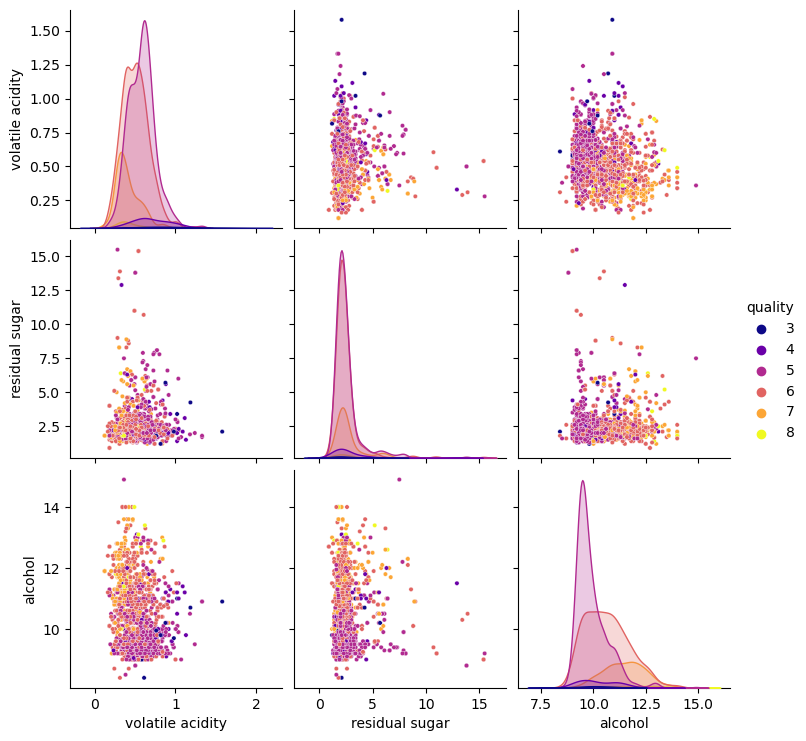

In [5]:
columns = ['volatile acidity', 'residual sugar', 'alcohol', 'quality']
sns.pairplot(data.loc[:, columns], hue='quality', palette='plasma', plot_kws={'s': 10});

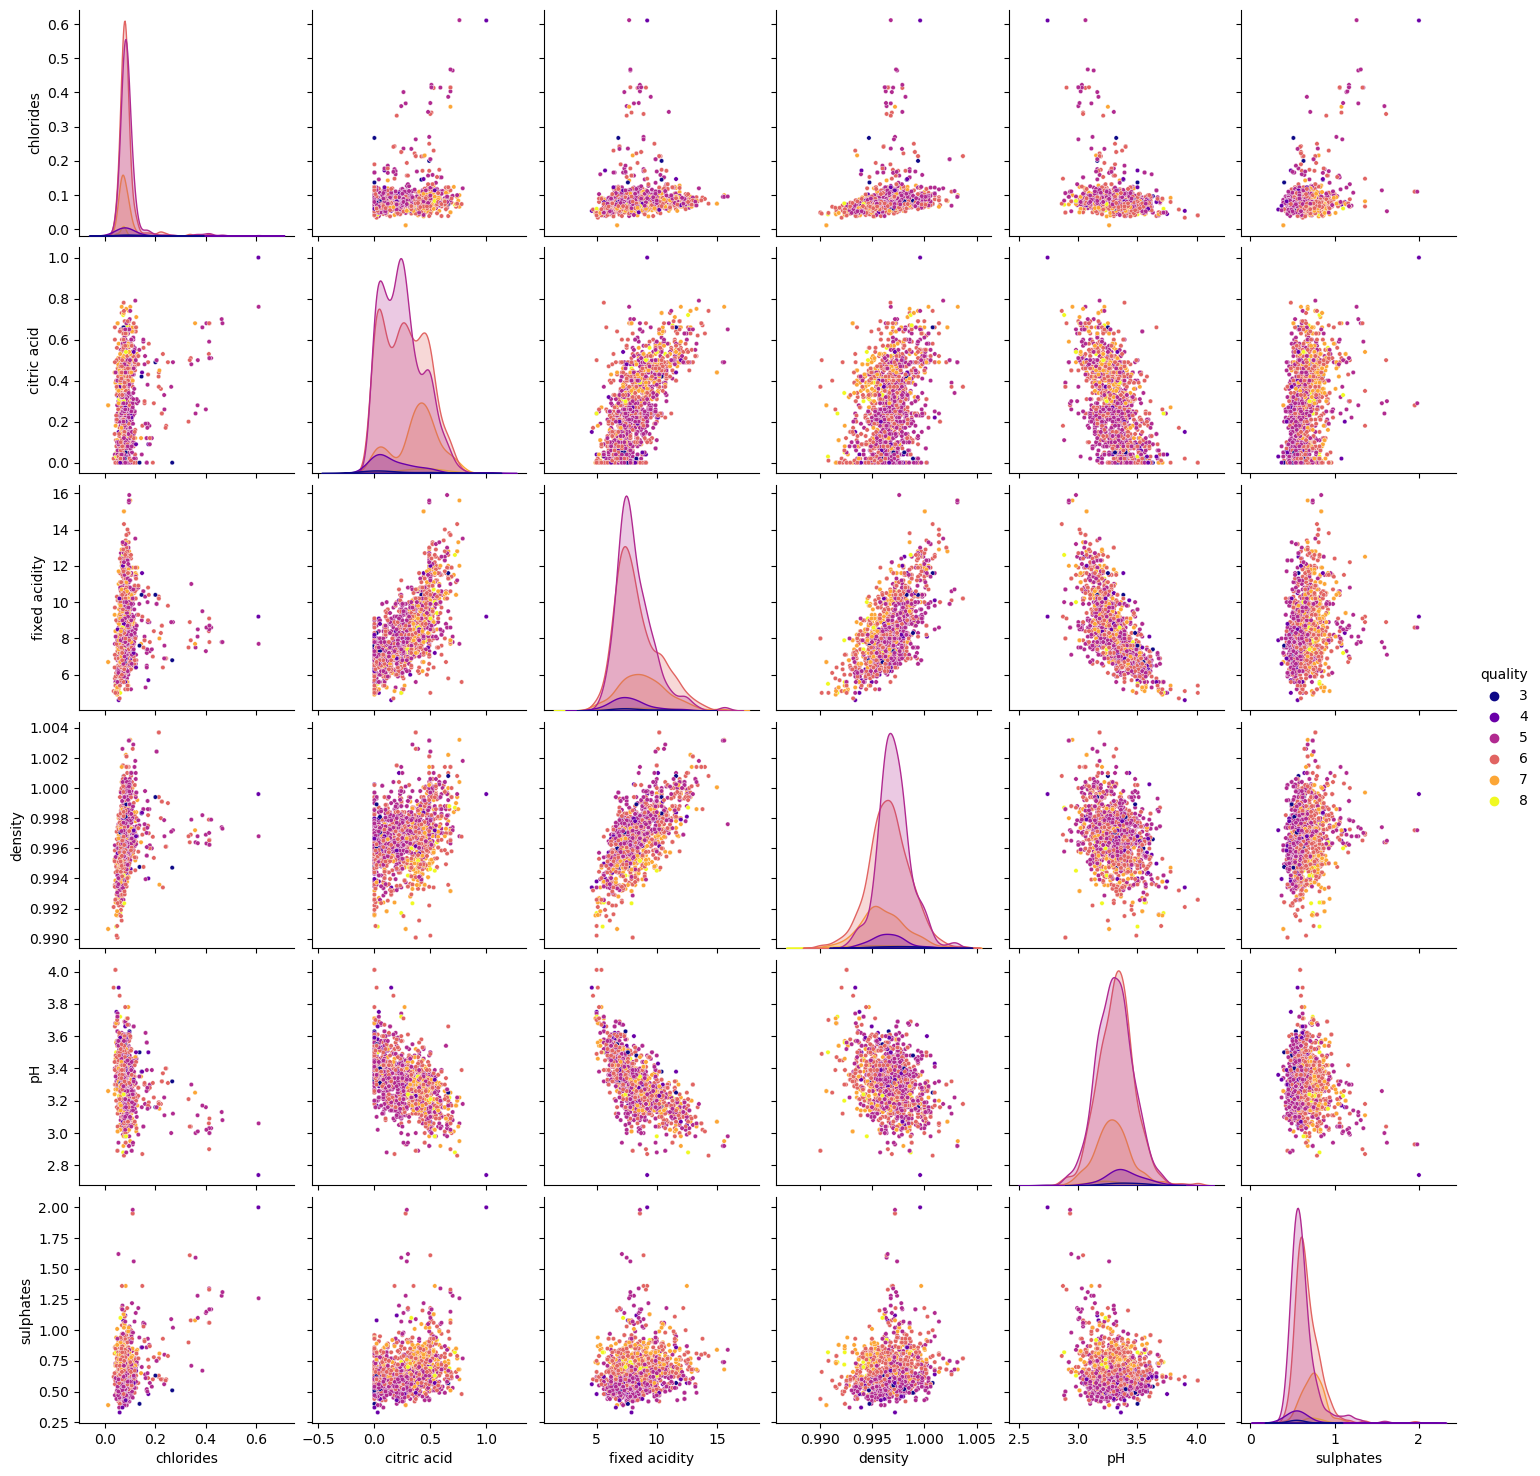

In [6]:
columns = ['quality', 'chlorides', 'citric acid', 'fixed acidity', 'density', 'pH', 'sulphates']
sns.pairplot(data.loc[:, columns], hue='quality', palette='plasma', plot_kws={'s': 10});

<div class="alert alert-info">

### Task 1 - Data Exploration [2 pts]

1. From the results of the describe function. What preprocessing step should we do first before we fit the model? Why? [1 pt]
2. List 1 interesting insight you can find from the pair plot result. [1 pt]
</div>

<b>Answers:</b>

1. We will be applying feature scaling to the dataset, mainly because of the different scales that each feature are using.For this, we choose StandardScaler.
2. Higher volatile acidity could mean lower quality. Higher alcohol content could mean better quality. This pattern could suggest that alcohol level is a significant predictor of wine quality, indicating a potential area of focus for more detailed statistical analysis or for feature importance in predictive modeling.

## Data Segregation

To segregate the data, first we split the predictors and target variable as the variables `X` and `y` respectively.

In [7]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]

Now let's split the dataset into a train-val set and a holdout test set. Let's use 20% of the datapoints as our holdout set then the remaining 80% for our train-val set.

<div class="alert alert-info">

### Task 2 - Data Segregation [1 pt]

Using sklearn's `train_test_split` function, separate the predictors `X` and target `y` into a 80-20 trainval-test split. Place the result in the variables named `X_trainval`, `X_holdout`, `y_trainval`, `y_holdout` respectively. Use a random state of `143` to ensure reproducibility. [1 pt]

</div>

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_trainval, X_holdout, y_trainval, y_holdout = train_test_split(X, y, random_state=143, test_size=0.2)


## Model Training

Now that we've segregated the data, we can now use the train-val to determine the best model and corresponding hyperparameters for this dataset. To do this, we'll define our model training pipeline using `sklearn`'s `Pipeline` class to prevent data leakage during training and testing. Succeedingly, we will use `GridSearchCV` to conveniently perform grid search along with a cross validation procedure in training our models.

We'll use a total of 7 models in this exercise which we import accordingly in the next cell:

1. SVR
2. kNN Regressor
3. Lasso Regressor
4. Ridge Regressor
5. Linear Regression
6. Random Forest Regressor
7. Gradient Boosting Regressor

We'll also use a `StandardScaler` to normalize our dataset.

In [10]:
import numpy as np

# Sklearn pipeline
from sklearn.pipeline import Pipeline

# Data Preprocessing
from sklearn.preprocessing import StandardScaler

# 7 ML models
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

<div class="alert alert-info">

### Task 3 - Defining the Hyperparameter Search Space [1 pt]

Now let's define the hyperparameter search space for each of our models.

Set the following hyperparameter ranges in their corresponding variables: [1 pt]
    
1. Regularization parameter `C` and `alpha` for `SVR` and linear models `Ridge`, and `Lasso` - `[1.e-05, 1.e-03, 1.e-01, 1.e+01, 1.e+03, 1.e+05]`
2. Max depth for tree models `RF Regressor` and `GB Regressor` - from `5` to `15`
3. Learning rate for boosting models `GB regressor` - `[0.1, 0.5, 1.]`
4. Number of neighbors setting for `kNN` models - from `5` to `11`
</div>

In [11]:
C_range = [1.e-5, 1.e-3, 1.e-1, 1.e+1, 1.e+3, 1.e+5]
alpha_range = [1.e-5, 1.e-3, 1.e-1, 1.e+1, 1.e+3, 1.e+5]
max_depth_range = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
learning_rate_range = [0.1, 0.5, 1.]
n_neighbor_range = [5, 6, 7, 8, 9, 10, 11]

With our hyperparameter search space define, we can now initialize our model training pipeline and hyperparameter search grid which `GridSearchCV` will use in its iterations.

In [12]:
# Prepare the pipeline and parameter grid
steps = [('scaler', StandardScaler()), ('clf', None)]
pipe = Pipeline(steps)
param_grid = [
    {'clf': [SVR()], 'clf__C': C_range},
    {'clf': [Ridge(), Lasso()], 'clf__alpha': alpha_range},
    {'clf': [KNeighborsRegressor()], 'clf__n_neighbors': n_neighbor_range},
    {'clf': [RandomForestRegressor()], 'clf__max_depth': max_depth_range, 'clf__random_state': [143]},
    {'clf': [GradientBoostingRegressor()], 'clf__max_depth': max_depth_range,
     'clf__learning_rate': learning_rate_range, 'clf__random_state': [143]},
    {'clf': [LinearRegression()]}
]

In [13]:
from sklearn.model_selection import GridSearchCV

With our parameter grid defined, we can now use `sklearn`'s `GridSearchCV` to perform the model training and validation for us. Complete the task below involving initialization of `GridSearchCV` according to the required settings then training it using the train-val dataset.

<div class="alert alert-info">

### Task 4 - `GridSearchCV` initialization and fitting [2 pts]

Initialize the `GridSearchCV` object into the `grid_search` variable with the following settings: [1 pt]

1. Cross validation procedure with `5`-fold validation
2. Scoring using the $R^2$ metric
3. `n_jobs` set to `-1` to enable parallel computing
4. Return the train score to allow post fitting inspection

Afterwards, fit the `grid_search` object onto the trainval dataset. *Estimated runtime: 45 secs* [1 pt] 
</div>

In [14]:
cv = 5
scoring = 'r2'
grid_search = GridSearchCV(pipe, param_grid, cv=cv, scoring=scoring,
                           n_jobs=-1, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', None)]),
             n_jobs=-1,
             param_grid=[{'clf': [SVR()],
                          'clf__C': [1e-05, 0.001, 0.1, 10.0, 1000.0,
                                     100000.0]},
                         {'clf': [Ridge(), Lasso()],
                          'clf__alpha': [1e-05, 0.001, 0.1, 10.0, 1000.0,
                                         100000.0]},
                         {'clf': [KNeighborsRegressor()],
                          'clf__n_neighbors': [5, 6, 7, 8, 9, 10, 11]},
                         {'clf': [RandomForestRegressor()],
                          'clf__max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                             15],
                          'clf__random_state': [143]},
                         {'clf': [GradientBoostingRegressor()],
                          'clf__learning_rate': [0.1, 0.5, 1.0],
                          'clf__max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                             15],
                          'clf__random_state': [143]},
                         {'clf': [LinearRegression()]}],
             return_train_score=True, scoring='r2')

## Model Evaluation

After successfully fitting the gridsearch function, we can retrieve the best model and the corresponding score using its attributes

In [15]:
print(f"The best model is: {grid_search.best_params_}")
print(f"with an R^2 score of: {grid_search.best_score_}")

The best model is: {'clf': RandomForestRegressor(), 'clf__max_depth': 14, 'clf__random_state': 143}
with an R^2 score of: 0.44016466999319837


Furthermore, we can inspect the results by looking at the `cv_results_` attribute. We store this as a pandas DataFrame for easier manipulation.

In [34]:
cv_results = pd.DataFrame(grid_search.__dict__['cv_results_'])
cv_results.sort_values('mean_test_score', ascending=False).head()
# cv_results.columns

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_clf__C,param_clf__alpha,param_clf__n_neighbors,param_clf__max_depth,param_clf__random_state,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
34,0.735897,0.004404,0.013086,0.001862,RandomForestRegressor(),NaN,NaN,NaN,14,143,...,0.440165,0.056270,1,0.915933,0.913335,0.910115,0.910516,0.913211,0.912622,0.002123
35,0.761687,0.032324,0.012497,0.001512,RandomForestRegressor(),NaN,NaN,NaN,15,143,...,0.438860,0.058575,2,0.919945,0.916144,0.914198,0.914316,0.917403,0.916401,0.002137
32,0.733164,0.006423,0.013680,0.000786,RandomForestRegressor(),NaN,NaN,NaN,12,143,...,0.438614,0.056230,3,0.900327,0.896422,0.892061,0.892756,0.895305,0.895374,0.002948
33,0.745897,0.003695,0.012953,0.000867,RandomForestRegressor(),NaN,NaN,NaN,13,143,...,0.438448,0.055654,4,0.910903,0.907160,0.903747,0.904014,0.906468,0.906458,0.002591
31,0.694099,0.011706,0.012033,0.000835,RandomForestRegressor(),NaN,NaN,NaN,11,143,...,0.435845,0.058642,5,0.886290,0.879963,0.876646,0.875563,0.878850,0.879462,0.003752


Using this data, we can create visualizations that allows us to further analyze the result of our model training.

<div class="alert alert-info">

### Task 5 - Model Evaluation [2 pts]

Create a visualization of the model performance result. Interpret and explain one insight you get from the visualization that you made. [2 pts]

*Hint*: These are some visualizations that you can do (but don't limit yourself from these ones, you can choose what you'd like to highlight in this exercise):
1. Train versus validation score plots
2. Validation score across different models
3. Runtime across different models and/or hyperparameters
</div>

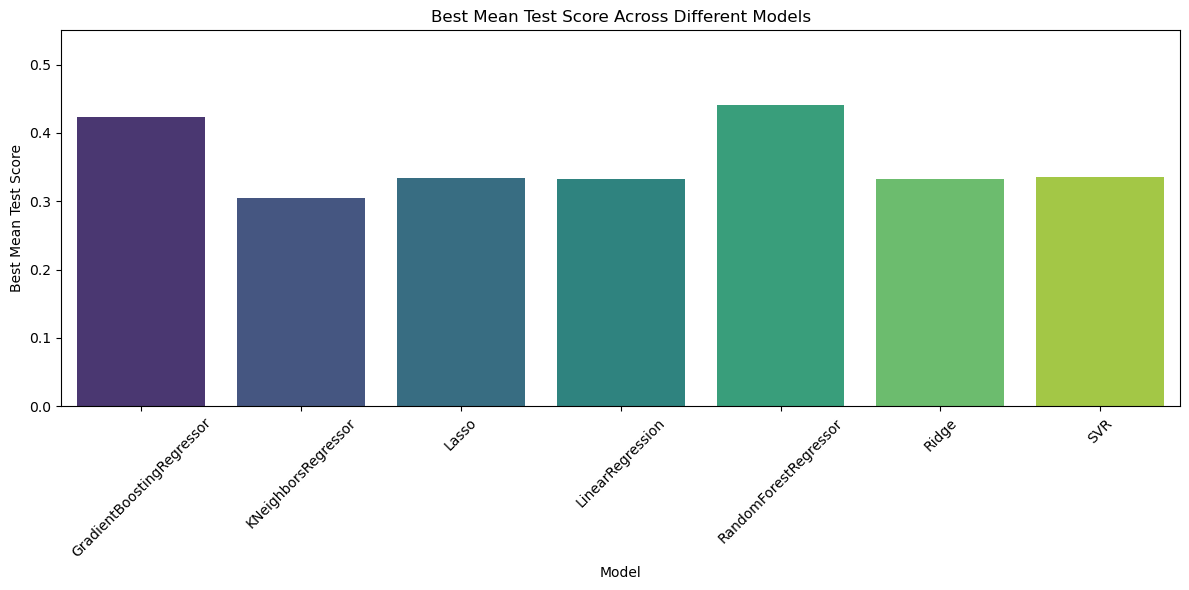

In [17]:
# Extract model name from 'param_clf' as string for easier manipulation
cv_results['Model'] = cv_results['param_clf'].astype(str).str.split("(", n=1).str[0]

# Group by Model and find the best mean test score for each model
model_performance = cv_results.groupby('Model')['mean_test_score'].max().reset_index()

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='mean_test_score', data=model_performance, palette='viridis')
plt.title('Best Mean Test Score Across Different Models')
plt.xticks(rotation=45)
plt.ylabel('Best Mean Test Score')
plt.ylim(0, 0.55)
plt.xlabel('Model')
plt.tight_layout()

# Show plot
plt.show()

## Final Model Testing

Finally, let's inspect the performance of the best model using a dataset that it has not yet seen during training.

<div class="alert alert-info">

### Task 6 - Model Testing [2 pts]

Using the best model with the corresponding optimal hyperparameters, fit the model using all of the training-validation dataset, then record its $R^2$ score in the `best_model_score` variable. [1 pt]

</div>

In [26]:
rfr = RandomForestRegressor(max_depth=15, random_state=143)
rfr.fit(X_trainval, y_trainval)

best_model_score = rfr.score(X_holdout, y_holdout)
best_model_score

0.5129611942357009

<div class="alert alert-info">

Comment on the test score of the best model. [1 pt]

</div>

While the training score reached a peak value of approximately 0.92, the resulting test score only produced 0.513, which is relatively far from our expectations. One possible reason for this is we might be overfitting (the model does not generalize well beyond the training set). Nonetheless, while the test score value may be low, it may be worth finding out what the baseline for this dataset may be. Playing around with other hyperparameters associated with the algorithm may deem fruitful.

## Business Value Articulation

<div class="alert alert-block alert-info">
    
### Task 7 - Business Value Articulation [6 pts]

Understanding the dataset above, list 2 possible business applications of the dataset and machine learning model. You can take the perspective of anyone in the supply chain (i.e. consumer, producer, distributor, etc.). [2 pts]
</div>

<b>Application 1:</b> By leveraging insights from the wine quality dataset, consumers can make more informed decisions when selecting wines. A machine learning model that predicts wine quality based on measurable features such as acidity, sugar content, alcohol level, and others directly observable on bottle labels empowers consumers to identify high-quality wines with confidence. This capability enhances the wine-buying experience by providing a data-driven approach to selecting wines that align with personal preferences and taste profiles, ensuring satisfaction and potentially introducing consumers to higher-quality selections they might not have considered otherwise.

<b>Application 2:</b> Winemakers can use the insights derived from a machine learning model to refine their wine production processes. By understanding the key factors that influence wine quality, producers can optimize their use of ingredients and processing methods to consistently produce wines of higher quality. This strategic approach enables winemakers to allocate resources more efficiently, focusing on the aspects of production that have the most significant impact on quality. In turn, this can lead to cost savings by minimizing waste and unnecessary expenditure on less impactful ingredients. Additionally, producing higher-quality wine enhances brand reputation and allows for premium pricing, directly contributing to increased profitability and competitive advantage in the market.


<div class="alert alert-block alert-info">
Understanding the analysis results using any of the machine learning models you have implemented above, list 2 main take aways from your analysis, include supporting graphs or results. [4 pts]
</div>

<b>Take away 1:</b> The analysis indicates that Random Forest Regressor performed the best among the tested models, showcasing the strength of ensemble methods in handling complex datasets. However, the performance also suggests potential overfitting, as indicated by the difference in $R^2$ scores between training and validation sets. This implies that while complex models can capture intricate patterns in the data, they also risk memorizing the training data too closely, which can degrade generalization to unseen data. <font color='red'>(See graph below for the comparison of training vs validation scores across models)</font>

<b>Take away 2:</b> Despite extensive hyperparameter tuning, including adjustments to max_depth, n_estimators, min_samples_split, and feature selection, the improvement in model performance was marginal. This highlights a critical aspect of machine learning: not all performance issues can be resolved through hyperparameter tuning alone. Factors such as data quality, inherent noise, and the complexity of the underlying patterns play significant roles. <font color='red'>(See plot below showing the $R^2$ score changes with different hyperparameter values)</font>


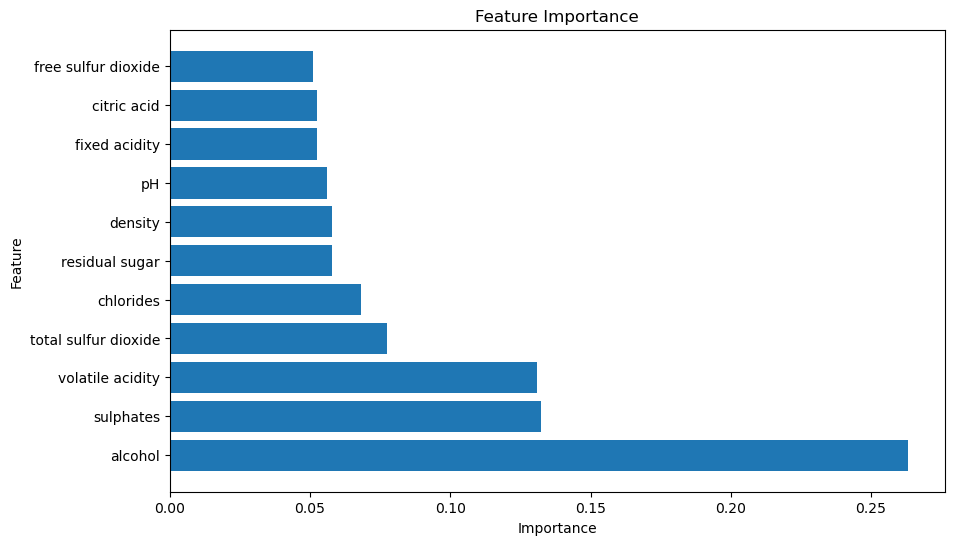

In [19]:
best_model = RandomForestRegressor(max_depth=15, random_state=143)
best_model.fit(X_trainval, y_trainval) 

# Retrieve feature importances
feature_importances = best_model.feature_importances_

# Create a DataFrame to store feature importances with corresponding feature names
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance values
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [33]:
X_trainval, X_holdout, y_trainval, y_holdout = train_test_split(X[['alcohol', 'sulphates', 'volatile acidity', 'total sulfur dioxide']], y, random_state=143, test_size=0.2)

best_model = RandomForestRegressor(max_depth=15, random_state=143)

# Train your best model on the entire dataset
best_model.fit(X_trainval, y_trainval)  # Replace X_train and y_train with your training data

best_model_score = best_model.score(X_holdout, y_holdout)
best_model_score

0.5129611942357009